In [115]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

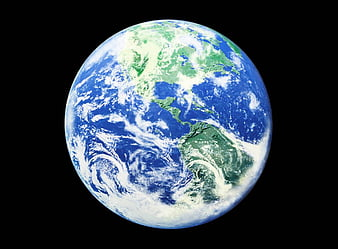

In [116]:
# img = cv2.imread('/content/drive/MyDrive/Trichy cllg sem 2 data/IVA Labs/1.X-ray-broken-arm-400x534_0.jpg', 1)
img = cv2.imread('/content/drive/MyDrive/Trichy cllg sem 2 data/IVA Labs/1.Earth-img1.jpg', 1)
cv2_imshow(img)

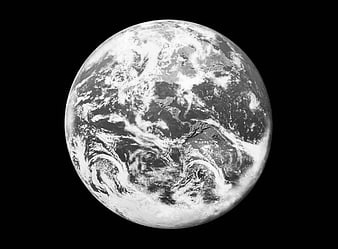

In [117]:
#  grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


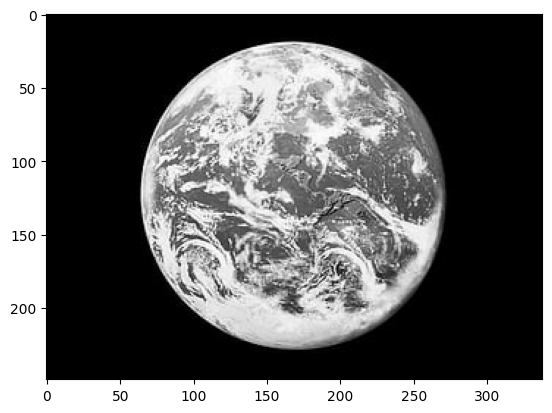

In [118]:
(row, col) = img.shape[0:2]
gray_image = np.zeros((row, col), dtype=np.uint8)

for i in range(row):
    for j in range(col):
        gray_image[i, j] = int(sum(img[i, j]) * 0.33)

plt.imshow(gray_image, cmap='gray')
plt.title("Manually Converted Grayscale Image")
plt.axis('off')
plt.show()


Adjust the brightness and contrast  
g(i,j)=α⋅f(i,j)+β

alpha - control Contrast (b 1.5 here)

beta - control brightness (by 50 here)


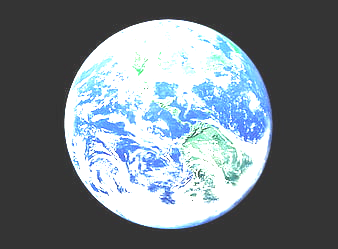

In [120]:
# adjusting the brightness and contrast
bright = cv2.convertScaleAbs(img, alpha=1.5, beta=50)
cv2_imshow(bright)


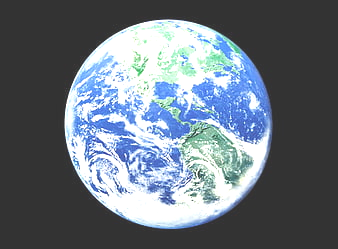

In [121]:
# Increase the brightness
bright = cv2.convertScaleAbs(img, alpha=1, beta=50)
cv2_imshow(bright)


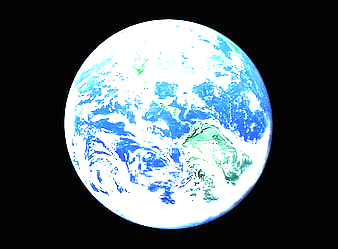

In [122]:
# Increase the contrast
contrast = cv2.convertScaleAbs(img, alpha=2, beta=0)
cv2_imshow(contrast)


#Gaussian blur -
(15, 15): kernel size for the Gaussian blur; filter will consider a 15x15 grid of pixels around each pixel to calculate the blurred value.

0: This specifies the standard deviation (sigma) of the Gaussian distribution used to create the blur kernel. By setting it to 0, OpenCV will automatically calculate an appropriate sigma value based on the kernel size.

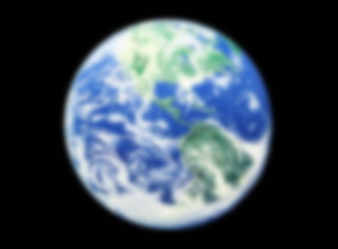

In [123]:
#  Gaussian blur -- smooth the image
blur = cv2.GaussianBlur(img, (15, 15), 0)
cv2_imshow(blur)


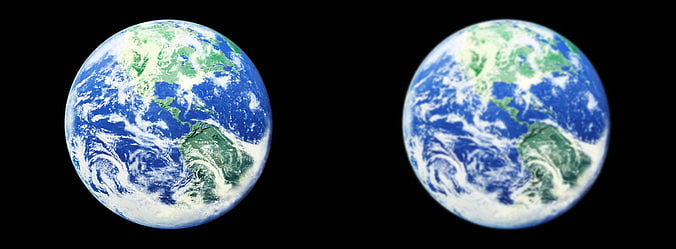

In [124]:
gaussian_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)  # Normalize the kernel --> to ensure the sum of all values equals 1
blurred_image = cv2.filter2D(img, -1, gaussian_kernel)

gg = np.hstack((img,blurred_image))
cv2_imshow(gg)


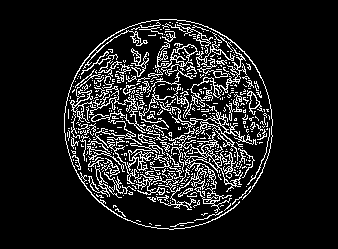

In [125]:
# edge detection using -- Canny algorithm
edges = cv2.Canny(img, 100, 200)   #100 lower threshold, 200 upper treshold
cv2_imshow(edges)


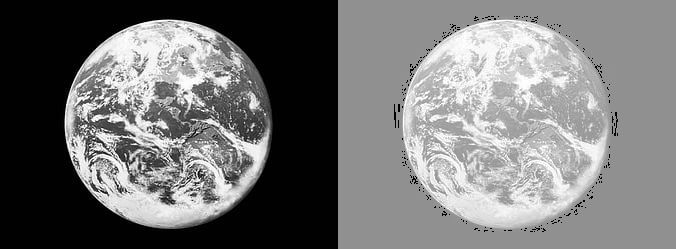

In [126]:
# histogram equalization
gray_eq = cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
res = np.hstack((gray,gray_eq)) #stacking images side-by-side
cv2_imshow(res)


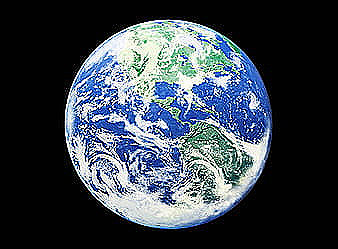

In [127]:
# Sharpen--- using convolution kernel
kernel_sharpening = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)
cv2_imshow(sharpened)


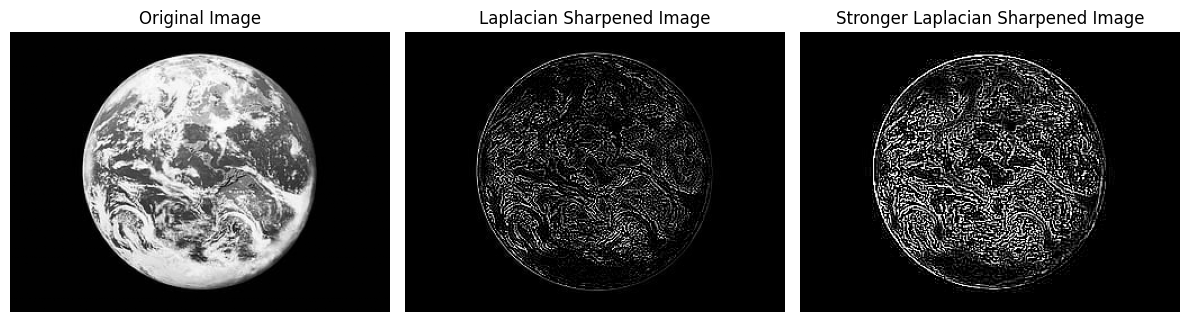

In [128]:
#  Laplacian filter
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
sharpened_image_1 = cv2.filter2D(gray, -1, laplacian)
sharpened_image_1 = np.uint8(np.clip(sharpened_image_1, 0, 255))  # Normalize

#  stronger Laplacian filter
strong_laplacian = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpened_image_2 = cv2.filter2D(gray, -1, strong_laplacian)
sharpened_image_2 = np.uint8(np.clip(sharpened_image_2, 0, 255))

# res = np.hstack((gray,sharpened_image_1,sharpened_image_2)) #stacking images side-by-side
# cv2_imshow(res)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
# Laplacian
plt.subplot(1, 3, 2)
plt.imshow(sharpened_image_1, cmap='gray')
plt.title("Laplacian Sharpened Image")
plt.axis('off')
# Stronger Laplacian
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image_2, cmap='gray')
plt.title("Stronger Laplacian Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()


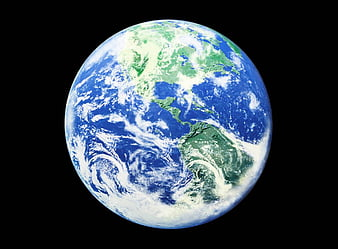

In [129]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)


##Negative transformation of an image

s = intensity_max — r

In [130]:
# # HARD CODE FOR NEGATIVE IMG
# height, width, _ = img.shape
# h_img = np.zeros_like(img) #---->>>> imp

# for i in range(0, height - 1):
#    for j in range(0, width - 1):
#       pixel = img[i, j].copy()      # red
#       pixel[0] = 255 - pixel[0]     # green
#       pixel[1] = 255 - pixel[1]     # blue
#       pixel[2] = 255 - pixel[2]
#       h_img[i, j] = pixel
# # cv2_imshow( h_img)

In [131]:
img_neg = cv2.bitwise_not(img)
# cv2_imshow(img_neg)

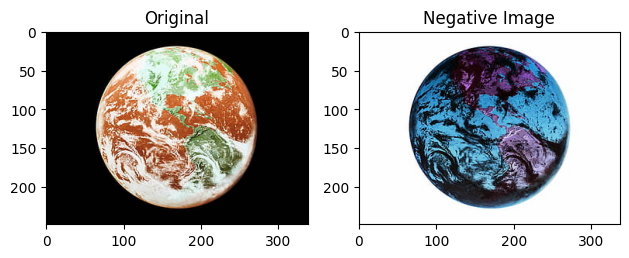

In [132]:

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Negative Image")
plt.imshow(img_neg)

# plt.subplot(1, 3, 3)
# plt.title("hard code for Negative Image")
# plt.imshow(h_img)

plt.tight_layout()
plt.show()

#Sharpening image


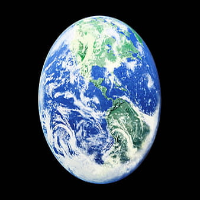

In [133]:
small_img = cv2.resize(img, (200, 200))
cv2_imshow(small_img)

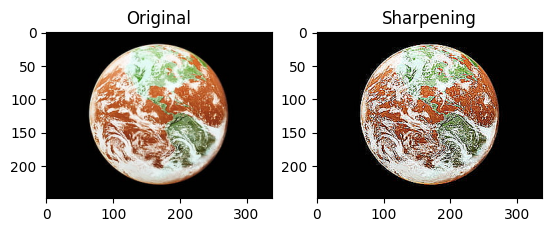

In [134]:

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(img, -1, kernel)

#Save the image
cv2.imwrite('sharpened_image.jpg', sharpened_image)

#Plot the sharpened image
plt.subplot(1, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpened_image)
plt.show()
